# Cycling data 2. Personal data - heart rate zones, calorie burn, power profile etc


### Contents
0. Install and import libraries
1. Parse a .fit file and read into Pandas df
2. Data cleansing
3. Enter personal data
4. Heart rate zones
5. Calorie burn
6. Power profile


#### To do:

- [ ] calculate duration based on pandas timedelta
- [ ] calculate median power
- [ ] legend for circle graph
- [ ] .fit file with powerdata
- [ ] more info on metrics/formula's

## 0. Install fitparse and import the python libraries

We use the fitparse library to parse the .fit file.

Please find the github of fitparse project here: http://dtcooper.github.io/python-fitparse/

In [1]:
#!pip install fitparse 

In [2]:
#import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fitparse

## 1a. import the .fit file and read it into pandas dataframe


In [1]:
# parse the fit file and read it into a list called workout
#source: http://johannesjacob.com/
from fitparse import FitFile
import pandas as pd
import matplotlib.pyplot as plt

fitfile = FitFile('3919172E.fit') ### enter the name of the file here!

while True:
    try:
        fitfile.messages
        break
    except KeyError:
        continue
workout = []
for record in fitfile.get_messages('record'):
    r = {}
    for record_data in record:
        r[record_data.name] = record_data.value
    workout.append(r)


In [3]:
#read this list into a pandas dataframe
fietsdata = pd.DataFrame(workout)
fietsdata.head()

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,left_right_balance,left_torque_effectiveness,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp
0,9241.0,108.0,64.0,0,0.0,108.0,5.926,None,115,None,None,None,624663697.0,57981701.0,111.0,None,None,5.926,23,2020-05-09 08:00:47
1,9370.0,108.0,65.0,0,12.0,108.0,6.471,None,117,None,None,None,624663458.0,57980727.0,129.0,None,None,6.471,23,2020-05-09 08:00:48
2,9370.0,107.0,65.0,0,12.0,107.0,6.327,None,119,None,None,None,624663200.0,57979693.0,112.0,None,None,6.327,23,2020-05-09 08:00:49
3,9482.0,107.0,65.0,0,24.0,107.0,6.214,None,120,None,None,None,624662921.0,57978719.0,132.0,None,None,6.214,23,2020-05-09 08:00:50
4,9674.0,106.0,66.0,1,24.0,106.0,6.049,None,121,None,None,None,624662723.0,57977665.0,60.0,None,None,6.049,23,2020-05-09 08:00:51


## 2. Data cleaning

In [4]:
fietsdata.dtypes

accumulated_power                    float64
altitude                             float64
cadence                              float64
calories                               int64
distance                             float64
enhanced_altitude                    float64
enhanced_speed                       float64
grade                                 object
heart_rate                             int64
left_pedal_smoothness                 object
left_right_balance                    object
left_torque_effectiveness             object
position_lat                         float64
position_long                        float64
power                                float64
right_pedal_smoothness                object
right_torque_effectiveness            object
speed                                float64
temperature                            int64
timestamp                     datetime64[ns]
dtype: object

In [5]:
# convert m/s to km/h
# * 3600s/ 1000 = 3.6
fietsdata['speed_kmh'] = fietsdata['enhanced_speed'] *3.6
fietsdata.head() # check new column speed_kmh at right

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,left_torque_effectiveness,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp,speed_kmh
0,9241.0,108.0,64.0,0,0.0,108.0,5.926,None,115,None,...,None,624663697.0,57981701.0,111.0,None,None,5.926,23,2020-05-09 08:00:47,21.3336
1,9370.0,108.0,65.0,0,12.0,108.0,6.471,None,117,None,...,None,624663458.0,57980727.0,129.0,None,None,6.471,23,2020-05-09 08:00:48,23.2956
2,9370.0,107.0,65.0,0,12.0,107.0,6.327,None,119,None,...,None,624663200.0,57979693.0,112.0,None,None,6.327,23,2020-05-09 08:00:49,22.7772
3,9482.0,107.0,65.0,0,24.0,107.0,6.214,None,120,None,...,None,624662921.0,57978719.0,132.0,None,None,6.214,23,2020-05-09 08:00:50,22.3704
4,9674.0,106.0,66.0,1,24.0,106.0,6.049,None,121,None,...,None,624662723.0,57977665.0,60.0,None,None,6.049,23,2020-05-09 08:00:51,21.7764


In [6]:
#Convert position_long and position_lat to degrees instead of semicircles
fietsdata['pos_lat'] = fietsdata['position_lat']*  (180 / 2**31)
fietsdata['pos_long'] = fietsdata['position_long']*  (180 / 2**31)
fietsdata.head()

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp,speed_kmh,pos_lat,pos_long
0,9241.0,108.0,64.0,0,0.0,108.0,5.926,None,115,None,...,57981701.0,111.0,None,None,5.926,23,2020-05-09 08:00:47,21.3336,52.358706,4.859970
1,9370.0,108.0,65.0,0,12.0,108.0,6.471,None,117,None,...,57980727.0,129.0,None,None,6.471,23,2020-05-09 08:00:48,23.2956,52.358686,4.859888
2,9370.0,107.0,65.0,0,12.0,107.0,6.327,None,119,None,...,57979693.0,112.0,None,None,6.327,23,2020-05-09 08:00:49,22.7772,52.358665,4.859802
3,9482.0,107.0,65.0,0,24.0,107.0,6.214,None,120,None,...,57978719.0,132.0,None,None,6.214,23,2020-05-09 08:00:50,22.3704,52.358641,4.859720
4,9674.0,106.0,66.0,1,24.0,106.0,6.049,None,121,None,...,57977665.0,60.0,None,None,6.049,23,2020-05-09 08:00:51,21.7764,52.358625,4.859632


## 3.Personalisation

In [8]:
# Script to enter your age and weight
weight = int(input("Please enter your weight: "))
age = int(input("Please enter your age: "))
at= int(input("Please enter your aerobic treshold: "))

Please enter your weight: 94
Please enter your age: 44
Please enter your aerobic treshold: 172


## 4. Heart rate zones

In [9]:
# Enter aerobic treshold (at)

d1_lower = int(at * 0.7)
d2_lower = int(at * 0.8)
d3_lower = int(at * 0.9)

print("Your heart rate zones are:")
print("d0 < " +str(d1_lower))
print('d1 = '+ str(d1_lower)+ ' - '+str(d2_lower))
print('d2 = '+ str(d2_lower)+ ' - '+str(d3_lower))
print('d3 = '+ str(d3_lower)+ ' - '+str(at))
print('at = '+ str(at))
print("at+ > " +str(at))

Your heart rate zones are:
d0 < 120
d1 = 120 - 137
d2 = 137 - 154
d3 = 154 - 172
at = 172
at+ > 172


In [10]:
# add a new column to the datafield containing the heart rate zones
fietsdata['hr_zone'] = pd.cut(fietsdata.heart_rate, bins=[0, d1_lower,d2_lower,d3_lower,at, 220], labels=['d0', 'd1', 'd2','d3', 'at+'])
fietsdata.hr_zone

0        d0
1        d0
2        d0
3        d0
4        d1
         ..
14906    d1
14907    d1
14908    d1
14909    d1
14910    d1
Name: hr_zone, Length: 14911, dtype: category
Categories (5, object): ['d0' < 'd1' < 'd2' < 'd3' < 'at+']

In [11]:
#check to see the new dtype category for hr_zone
fietsdata.dtypes

accumulated_power                    float64
altitude                             float64
cadence                              float64
calories                               int64
distance                             float64
enhanced_altitude                    float64
enhanced_speed                       float64
grade                                 object
heart_rate                             int64
left_pedal_smoothness                 object
left_right_balance                    object
left_torque_effectiveness             object
position_lat                         float64
position_long                        float64
power                                float64
right_pedal_smoothness                object
right_torque_effectiveness            object
speed                                float64
temperature                            int64
timestamp                     datetime64[ns]
speed_kmh                            float64
pos_lat                              float64
pos_long  

In [12]:
#create a new dataframe 'zones' with heart rate data
counts = fietsdata.hr_zone.value_counts()
per    = fietsdata.hr_zone.value_counts(normalize=True).round(3)
percent100 = fietsdata.hr_zone.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
zones = pd.DataFrame({'counts': counts, 'fraction': per, 'percentage': percent100})
zones

,counts,fraction,percentage
d2,9922,0.665,66.5%
d3,4190,0.281,28.1%
d1,678,0.045,4.5%
d0,121,0.008,0.8%
at+,0,0.000,0.0%


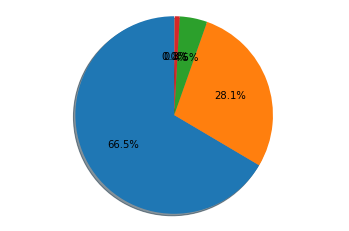

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'd2', 'd1', 'd3', 'd3', 'at+' TO DO CREATE LABELS or LEGEND
sizes = fietsdata.hr_zone.value_counts(normalize=True).round(3)
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show() # show image

## 5. Calories burned

### 5a. Calories burned based on Powermeter data

In [15]:
# watt * tijd = 
# watt = 1 joule/seconde

# Som (alle powermetingen)= totaal vermogen geleverd aan fiets eenheid: joule / kilojoule
# total_energy = sum['power']

total_energy = fietsdata['power'].sum()

# convert watt to kcal = 1 kilojoule = 0.239 kilocalorie
energy_kcal = total_energy * 0.239 / 1000

# Efficiency body = 21%
energy_used = energy_kcal / 0.21
text = "You've burned {:.0f} kcal"
print(text.format(energy_used))

You've burned 2815 kcal


### 5b. Calories burned based on heart rate

In [16]:
timetable = (fietsdata['timestamp'])
starttime= timetable.iloc[0]
endtime= timetable.iloc[-1]
#starttijd = timetable.iloc[1,0]
#print(starttijd

duration = endtime-starttime

print("Total duration was: "+ str(duration))

Total duration was: 0 days 06:03:49


In [17]:
#source: http://www.shapesense.com/fitness-exercise/calculators/heart-rate-based-calorie-burn-calculator.shtml
HR= avg_heart_rate= fietsdata['heart_rate'].mean()# gemiddelde heartrate
W = weight
A = age
T = 6 #convert pandas timedelta to real time in hours
Calorie_burned_man = ((-55.0969 + (0.6309 * HR) + (0.1988 * W) + (0.2017 * A)) / 4.184) * 60 * T
text = "You've burned {:.0f} kcal."
print(text.format(Calorie_burned_man))

You've burned 5795 kcal.


## 6. Power profile

In [18]:
power_profile = med_power / weight  # define medium power
print("Your power profile was "+ str(round(power_profile,2)) + ' W/kg')

NameError: name 'med_power' is not defined